## Sparse Matrix 데이터 구조

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import coo_matrix, csr_matrix, csc_matrix # array도 있음

In [3]:
# 좌표, 값, 전체 행렬의 크기

data = np.array([1, 5, 3, 4, 2, 6])
row = np.array([0, 1, 0, 1, 0, 2])
col = np.array([0, 1, 2, 0, 1, 2])

coo = coo_matrix((data, (row, col)), shape = (10, 10))
print('--coo 형식-----')
print(coo.todense())

csr = csr_matrix((data, (row, col)), shape=(10, 10))
print('--csr 형식-----')
print(csr.todense())

csc = csc_matrix((data, (row, col)), shape=(10, 10))
print('--csc 형식-----')
print(csc.todense())

--coo 형식-----
[[1 2 3 0 0 0 0 0 0 0]
 [4 5 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--csr 형식-----
[[1 2 3 0 0 0 0 0 0 0]
 [4 5 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--csc 형식-----
[[1 2 3 0 0 0 0 0 0 0]
 [4 5 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [4]:
# 행 기반 합산
print("COO 행 기반 합산:\n", coo.sum(axis=1))
print("CSR 행 기반 합산:\n", csr.sum(axis=1))
print("CSC 행 기반 합산:\n", csc.sum(axis=1))

# 열 기반 합산
print("CSR 열 기반 합산:\n", csr.sum(axis=0))
print("CSC 열 기반 합산:\n", csc.sum(axis=0))

COO 행 기반 합산:
 [[6]
 [9]
 [6]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
CSR 행 기반 합산:
 [[6]
 [9]
 [6]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
CSC 행 기반 합산:
 [[6]
 [9]
 [6]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
CSR 열 기반 합산:
 [[5 7 9 0 0 0 0 0 0 0]]
CSC 열 기반 합산:
 [[5 7 9 0 0 0 0 0 0 0]]


### sparse, dense 비교

In [5]:
data = np.ones(50000)
row = np.random.randint(0, 10000, size = 50000) # 임의의 50000개 좌표 생성
col = np.random.randint(0, 10000, size = 50000)


coo = coo_matrix((data, (row, col)), shape=(10000, 10000))
csr = coo.tocsr()
csc = coo.tocsc()

arr = csr.toarray()

In [6]:
# 크기 비교
print("Sparse Matrix (COO) 크기:", coo.data.nbytes + coo.row.nbytes + coo.col.nbytes)
print("Scipy sparse matrix (CSR) 크기:", csr.data.nbytes + csr.indices.nbytes + csr.indptr.nbytes)
print("Scipy sparse matrix (CSC) 크기:", csc.data.nbytes + csc.indices.nbytes + csc.indptr.nbytes)
print("Numpy toarray (CSR) 크기:", arr.nbytes)

Sparse Matrix (COO) 크기: 800000
Scipy sparse matrix (CSR) 크기: 639788
Scipy sparse matrix (CSC) 크기: 639788
Numpy toarray (CSR) 크기: 800000000


In [7]:
# 속도 비교
from time import time

t = time()
coo.sum(axis=1)
print(time() - t)

t = time()
csr.sum(axis=1)
print(time() - t)

t = time()
csc.sum(axis=1)
print(time() - t)


0.001237630844116211
0.0006296634674072266
0.0


### Movie data 실습

In [8]:

rating_df = pd.read_csv('..\dataset\movie.data', sep='\t', header=None, names = ['userID', 'movieID', 'rating', 'timestamp'])[['userID', 'movieID', 'rating']]
rating_df

,userID,movieID,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [9]:
# pivot table로 바꾸면 na가 아주 많은 null이 있다
pv_df=pd.pivot_table(data=rating_df, values='rating',index='movieID',columns='userID')
pv_df.fillna('-')

userID,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,-,-,4.0,4.0,-,-,-,4.0,...,2.0,3.0,4.0,-,4.0,-,-,5.0,-,-
2,3.0,-,-,-,3.0,-,-,-,-,-,...,4.0,-,-,-,-,-,-,-,-,5.0
3,4.0,-,-,-,-,-,-,-,-,-,...,-,-,4.0,-,-,-,-,-,-,-
4,3.0,-,-,-,-,-,5.0,-,-,4.0,...,5.0,-,-,-,-,-,2.0,-,-,-
5,3.0,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1679,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1680,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [10]:
# user 방향 sparse matrix 만들기
# id가 1부터 할당되어 있어서 갯수가 안맞다. 모두 -1 해줘야 한다.
ml_spm = csr_matrix((rating_df['rating'], (rating_df['userID']-1, rating_df['movieID']-1)),
                           shape=(rating_df['userID'].nunique(), rating_df['movieID'].nunique()))
ml_spm

<943x1682 sparse matrix of type '<class 'numpy.int64'>'
	with 100000 stored elements in Compressed Sparse Row format>

In [11]:
rating_df['movieID'].nunique()

1682

In [12]:
ml_dense = ml_spm.toarray()
ml_dense

array([[5, 3, 4, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]], dtype=int64)

## KNN-sklearn으로 대규모 추천시스템 만들어보기

In [13]:
# 데이터 불러오기
rating_df = pd.read_csv('..\dataset\movie.data', sep='\t', header=None, names = ['userID', 'movieID', 'rating', 'timestamp'])[['userID', 'movieID', 'rating']]
movie_info_df = pd.read_csv('..\dataset\movie.item', sep='|', encoding='latin')
movie_info_df.columns = ['movieID' , 'movie_title' , 'release_date' , 'video_release_date' ,
              'IMDb_URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Children' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']

### 데이터 준비

#### id -> index
- 0번부터 시작
- 중간에 비어 있는게 없어야 한다.


In [14]:
# mapping table
# {id: index, ...}
user_ids = rating_df['userID'].unique()
user2idx_dict = {x : i for i, x in enumerate(user_ids)}
idx2user_dict = {i : x for i, x in enumerate(user_ids)}

movie_ids = rating_df['movieID'].unique()
movie2idx_dict = {x : i for i, x in enumerate(movie_ids)}
idx2movie_dict = {i : x for i, x in enumerate(movie_ids)}

rating_df['u_idx'] = rating_df['userID'].map(user2idx_dict) # apply는 복잡한거 할 때, map은 category 단순 매핑할때 사용
rating_df['i_idx'] = rating_df['movieID'].map(movie2idx_dict) # apply는 복잡한거 할 때, map은 category 단순 매핑할때 사용

In [15]:
rating_df.sort_values(['u_idx', 'i_idx'])

,userID,movieID,rating,u_idx,i_idx
0,196,242,3,0,0
22773,196,257,2,0,10
10017,196,111,4,0,83
10981,196,25,4,0,86
35197,196,382,4,0,92
...,...,...,...,...,...
92090,941,300,4,942,652
99006,941,1007,4,942,672
69939,941,124,5,942,873
74458,941,993,4,942,935


#### 추천시스템을 위한 데이터의 분포 조사

영화별로 몇 명이나 봤는지 조사

In [16]:
rating_df.groupby('movieID').count()['userID'].sort_values(ascending = False)

movieID
50      583
258     509
100     508
181     507
294     485
       ... 
1576      1
1577      1
1348      1
1579      1
1682      1
Name: userID, Length: 1682, dtype: int64

Text(0, 0.5, 'number of ratings')

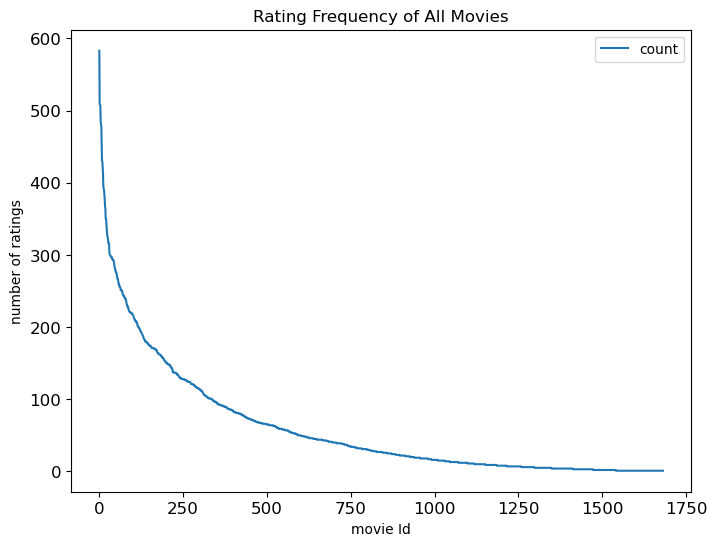

In [17]:
movies_count_df = pd.DataFrame(rating_df.groupby('movieID').size(), columns=['count'])
movies_count_df.head()
ax = movies_count_df.sort_values('count', ascending=False) \
                    .reset_index(drop=True) \
                    .plot(
                        figsize=(8, 6),
                        title='Rating Frequency of All Movies',
                        fontsize=12
                    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

#### sparse matrix 만들기
data, row_index, co_index, shape(row, col)

In [18]:
num_user = rating_df['u_idx'].nunique()
num_movie = rating_df['i_idx'].nunique()

#### train, val, test data split

6:2:2, 6:3:1, 7:2:1, 7:1.5:1.5 ....   
이번에는 9:0.5:0.5. colaboration filtering은 train data양이 중요하다.

In [19]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(rating_df, test_size = 0.1, random_state = 1004)
val_df, test_df = train_test_split(test_df, test_size = 0.5, random_state = 1004)

In [20]:
from scipy.sparse import coo_matrix
train_sp = coo_matrix((train_df['rating'], 
                 (train_df['u_idx'], train_df['i_idx'])), 
                shape = (num_user, num_movie))

### 모델 빌드 및 학습

In [21]:
knn = NearestNeighbors(n_neighbors=50, metric = 'cosine')
knn.fit(train_sp)

NearestNeighbors(metric='cosine', n_neighbors=50)

### 결과 추론 및 평가

In [22]:
# target user를 sp matrix 형태로 선언
target_user_idx = 8
target_tr_df = train_df[train_df['u_idx'] == target_user_idx]
data = [4, 5, 4, 4]
a = [0, 0, 0, 0]
b = [209, 170, 935, 355]
target_sp = coo_matrix((target_tr_df['rating'], ([0] * len(target_tr_df), target_tr_df['i_idx'])),
           shape = (1, num_movie))

In [23]:
len(target_tr_df['i_idx'])

209

In [24]:
dist, idx = knn.kneighbors(target_sp, n_neighbors = 50)

In [25]:
idx

array([[  8, 114, 534, 907, 375, 129, 311, 556, 504, 658, 333, 406, 421,
        885, 467, 453,   9, 325,  68,  52, 118, 339, 743,  88, 531, 739,
        102,  10,  23,  83, 915, 814,  22,  58,  80, 340, 662, 842, 442,
        348, 867,  85, 193, 542,  65, 584, 446,  45, 831, 110]],
      dtype=int64)

In [26]:
# 8번 유저에 대한 이웃들의 영화 평점 예측
n_df = rating_df[rating_df['u_idx'].isin(idx[0][1:])]
pred_df = n_df.groupby('movieID').mean()['rating'].sort_values(ascending = False)
pred_df = pred_df.reset_index().rename({'rating':'pred'}, axis = 1)
pred_df

,movieID,pred
0,791,5.0
1,1558,5.0
2,1589,5.0
3,793,5.0
4,797,5.0
...,...,...
1286,667,1.0
1287,138,1.0
1288,1246,1.0
1289,1410,1.0


In [27]:
# 평가

target_te_df = test_df[test_df['u_idx'] == target_user_idx]
target_te_df = target_te_df.sort_values('rating')
target_te_df

,userID,movieID,rating,u_idx,i_idx
4875,305,76,1,8,1009
2994,305,15,1,8,68
56051,305,597,2,8,278
5064,305,733,3,8,1066
56245,305,160,4,8,250
60117,305,863,4,8,780


In [28]:
pred_te_df = pred_df[pred_df['movieID'].isin(target_te_df['movieID'])].sort_values('pred')
pred_te_df

,movieID,pred
925,597,2.687500
527,76,3.500000
531,733,3.500000
486,863,3.571429
461,15,3.652174
398,160,3.764706


- 평점은 조금 틀려보인다.(RMSE)
- 추천시스템은 top N개를 추천할 때 그게 맞는지가 중요함.
- 순서를 잘 맞추냐 : nDCG

In [29]:
resul_df = pd.merge(target_te_df, pred_te_df, on = 'movieID', how='inner')[['movieID', 'rating', 'pred']]
resul_df

,movieID,rating,pred
0,76,1,3.500000
1,15,1,3.652174
2,597,2,2.687500
3,733,3,3.500000
4,160,4,3.764706
5,863,4,3.571429


### 모든 유저로 일반화

In [30]:
# target user를 sp matrix 형태로 선언

target_user_idx = 8
total_prd_df = pd.DataFrame(data = None, columns = ['movieID', 'userID', 'rating', 'pred'])
for target_user_idx in range(num_user):
    target_tr_df = train_df[train_df['u_idx'] == target_user_idx]
    target_sp = coo_matrix((target_tr_df['rating'], ([0] * len(target_tr_df), target_tr_df['i_idx'])),
            shape = (1, num_movie))
    dist, idx = knn.kneighbors(target_sp, n_neighbors = 50)

    # 8번 유저에 대한 이웃들의 영화 평점 예측
    n_df = rating_df[rating_df['u_idx'].isin(idx[0][1:])]
    pred_df = n_df.groupby('movieID').mean()['rating'].sort_values(ascending = False)
    pred_df = pred_df.reset_index().rename({'rating':'pred'}, axis = 1)

    # 평가
    target_te_df = test_df[test_df['u_idx'] == target_user_idx]
    target_te_df = target_te_df.sort_values('rating')

    pred_te_df = pred_df[pred_df['movieID'].isin(target_te_df['movieID'])]

    resul_df = pd.merge(target_te_df, pred_te_df, on = 'movieID', how='inner')[['movieID', 'userID', 'rating', 'pred']]
    total_prd_df = pd.concat([total_prd_df, resul_df])
total_prd_df

,movieID,userID,rating,pred
0,110,196,1,2.666667
0,281,186,4,3.629630
1,568,186,4,4.058824
2,588,186,4,4.190476
3,257,186,4,3.888889
...,...,...,...,...
10,285,936,4,4.045455
0,535,930,4,3.090909
1,45,930,4,4.500000
2,274,930,4,3.388889


In [31]:
total_prd_df.head(20)

,movieID,userID,rating,pred
0,110,196,1,2.666667
0,281,186,4,3.629630
1,568,186,4,4.058824
2,588,186,4,4.190476
3,257,186,4,3.888889
0,1002,22,1,1.000000
1,948,22,1,1.500000
2,1003,22,1,4.000000
3,1001,22,1,2.000000
4,229,22,2,3.000000


In [32]:
import plotly.express as px
px.violin(total_prd_df, x='rating', y='pred', box=True)

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(total_prd_df['rating'], total_prd_df['pred'], squared = False)

1.005131100671121

In [34]:
# 점수별 RMSE
for i in range(1, 6):
    rmse = mean_squared_error(total_prd_df[total_prd_df['rating'] == i]['rating'], 
                              total_prd_df[total_prd_df['rating'] == i]['pred'], squared = False)
    print(i, rmse)

1 2.0302974876665387
2 1.338198965967533
3 0.6925624876171201
4 0.6328087686589722
5 1.215121008973309


#### 분류 관점에서 좋아할 영화/아닌 영화로 나눠보자

In [35]:
good_df = total_prd_df[total_prd_df['rating'] > 3]
bad_df = total_prd_df[total_prd_df['rating'] < 3]

In [36]:
good_df['target_bool'] = 1
bad_df['target_bool'] = 0
cls_df = pd.concat([good_df, bad_df])
cls_df

C:\Users\User\AppData\Local\Temp\ipykernel_18364\2430273948.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_18364\2430273948.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,movieID,userID,rating,pred,target_bool
0,281,186,4,3.629630,1
1,568,186,4,4.058824,1
2,588,186,4,4.190476,1
3,257,186,4,3.888889,1
7,792,22,4,2.800000,1
...,...,...,...,...,...
3,284,943,2,3.222222,0
0,890,939,2,1.000000,0
0,827,936,2,2.571429,0
1,866,936,2,3.153846,0


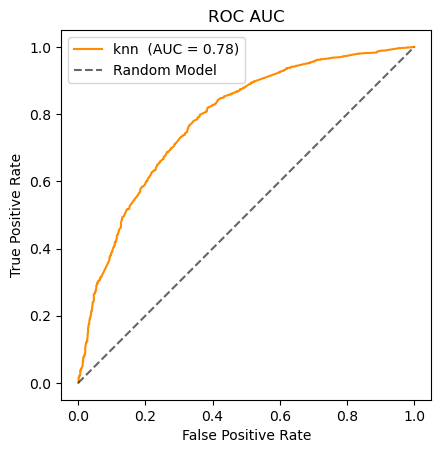

In [37]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    cls_df['target_bool'], # real 평점
    (cls_df['pred'] - 1)/4, # pred 확률
    name=f"knn ",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], color='k', label='Random Model', linestyle = '--', alpha = 0.6)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC")
plt.legend()
plt.show()

In [40]:
# 복습하고 최적의 k값을 찾아보기
# 115 0.9902222162421708
# 71  0.9931089248584817

# target user를 sp matrix 형태로 선언
for i in range(20, 80, 10):
    knn = NearestNeighbors(n_neighbors=i, metric = 'cosine')
    knn.fit(train_sp)

    total_prd_df = pd.DataFrame(data = None, columns = ['movieID', 'userID', 'rating', 'pred'])
    for target_user_idx in range(num_user):
        target_tr_df = train_df[train_df['u_idx'] == target_user_idx]
        target_sp = coo_matrix((target_tr_df['rating'], ([0] * len(target_tr_df), target_tr_df['i_idx'])),
                shape = (1, num_movie))
        dist, idx = knn.kneighbors(target_sp, n_neighbors = i)

        # 8번 유저에 대한 이웃들의 영화 평점 예측
        n_df = rating_df[rating_df['u_idx'].isin(idx[0][1:])]
        pred_df = n_df.groupby('movieID').mean()['rating'].sort_values(ascending = False)
        pred_df = pred_df.reset_index().rename({'rating':'pred'}, axis = 1)

        # 평가
        target_vl_df = val_df[val_df['u_idx'] == target_user_idx]
        target_vl_df = target_vl_df.sort_values('rating')

        pred_te_df = pred_df[pred_df['movieID'].isin(target_vl_df['movieID'])]

        resul_df = pd.merge(target_vl_df, pred_te_df, on = 'movieID', how='inner')[['movieID', 'userID', 'rating', 'pred']]
        total_prd_df = pd.concat([total_prd_df, resul_df])
    total_prd_df

    rmse = mean_squared_error(total_prd_df['rating'], total_prd_df['pred'], squared = False)
    print(i, rmse)

20 1.0166843268881862
30 1.0037926902567427
40 0.9976165460803285
50 0.9977289371304001
60 0.9961093956389486
70 0.9938882052463698
